# CRISMIS GSOC Project
## Step 1 - Retrieving and Plotting Image Files
### Aim : To demonstrate code writing ability in python, using jupyter notebook and hence, display the image files asked.

In [45]:
DOY=input("Enter the Day of the year (eg :207 ) : ")
Year=input("Enter the year (eg: 2011) : ")
img_file=input("Enter the .img file's code (eg: EN0220128630M) : ")
path_download=list(input("Enter the path of the location where the .img will be download(eg: \download...): ").split())

#The following statements would ensure that no unicode error will occur.
#beginning
length=len(path_download)
for x in range(length):
    if(path_download[x]=='\\'):
        length+=1
        path_download.insert(x,'\\')
path_download.append('\\')
x=''
path_download=x.join(path_download)
web_link=["https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/",Year,'_',DOY,'/',img_file,".IMG"]
web_link=x.join(web_link)
l=[path_download,img_file,".IMG"]
l1=[path_download,img_file,".png"]
path_download=x.join(l)
png_download=x.join(l1)
#end


Enter the Day of the year (eg :207 ) : 207
Enter the year (eg: 2011) : 2011
Enter the .img file's code (eg: EN0220128630M) : EW0220137668G
Enter the path of the location where the .img will be download(eg: \download...): C:\Users\agarw\OneDrive\Desktop


### The following statements will download the .IMG image. Kindly click on Save if a dialog box appears.
#### The source of installation : https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA

In [46]:
import webbrowser
webbrowser.open(web_link);

### The following section of code would convert the .IMG file into .png file and display it

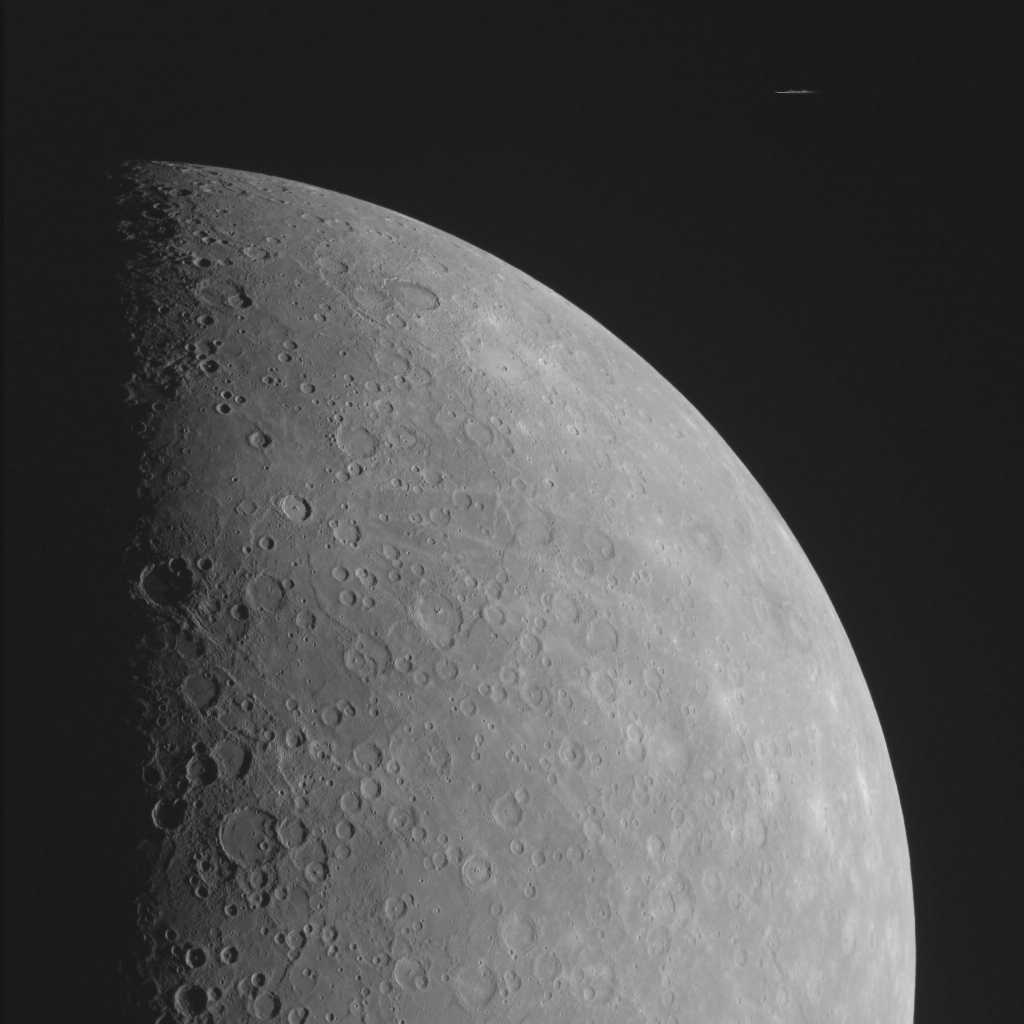

In [47]:
import sys
import re
import numpy as np
from PIL import Image

rawData  = open(path_download, 'rb').read()
# File size in bytes
fs       = len(rawData)
bitDepth = int(re.search("SAMPLE_BITS\s+=\s+(\d+)",str(rawData)).group(1))
bytespp  = int(bitDepth/8)
height   = int(re.search("LINES\s+=\s+(\d+)",str(rawData)).group(1))
width    = int(re.search("LINE_SAMPLES\s+=\s+(\d+)",str(rawData)).group(1))

# Offset from start of file to image data - assumes image at tail end of file
offset = fs - (width*height*bytespp)

# Check bitDepth
if bitDepth == 8:
    na = np.frombuffer(rawData, offset=offset, dtype=np.uint8).reshape(height,width)
elif bitDepth == 16:
    dt = np.dtype(np.uint16)
    dt = dt.newbyteorder('>')
    na = np.frombuffer(rawData, offset=offset, dtype=dt).reshape(height,width).astype(np.uint8)
else:
    print(f'ERROR: Unexpected bit depth: {bitDepth}',file=sys.stderr)
Image.fromarray(na).save(png_download);
from IPython import display 
display.Image(png_download)


# Completion of Step 1